# CART 

**Nafis Ahmed**
*132786195*

### Create a new python project and import/ load the dataset. 

In [234]:
import pandas as pd

boston = pd.read_csv("BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Run different statistical inspection and preprocessing on the dataset.

In [70]:
#No missing values
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [72]:
#Observe the variables and notice that CHAS feature is categorcal 
print(boston.describe())
print("----------------------------------------------------------------------------")
print("CHAS value count")
print("-----------------")
print(boston["chas"].value_counts())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [74]:
#Transform applicable variables into categorical
boston['chas']=boston['chas'].astype(object)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null object
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


### Split the data into training and testing datasets (chose different values)

In [237]:
from sklearn.model_selection import train_test_split
#x is all the variables that affect y
x=boston.iloc[:,0:-1]
y=boston.iloc[:,-1]
#create train and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 38)

### Create the regression tree

In [135]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(xtrain, ytrain)
DT_reg

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [143]:
DT_reg.score(xtest, ytest)

0.8638158554129738

### Find the best “complexity parameter” value that minimize the prediction error RMSE (root mean squared error).

In [262]:
max_depth_range = list(range(1, 6))
accuracy = []

import numpy as np
from sklearn.metrics import mean_squared_error

for depth in max_depth_range:
    
    clf = DecisionTreeRegressor(max_depth = depth, random_state = 0)
    clf.fit(xtrain, ytrain)    
    score = clf.score(xtest, ytest)
    accuracy.append(score)

p = 0.8605547737226514
print(accuracy)
print("         [1]                [2]                 [3]                 [4]                   [5]")
print("The best complexity measure is max_depth = 5")

[0.3549912108835794, 0.7117175518048153, 0.7333667140345552, 0.8299567203633235, 0.8605547737226514]
         [1]                [2]                 [3]                 [4]                   [5]
The best complexity measure is max_depth = 5


### Plot Models

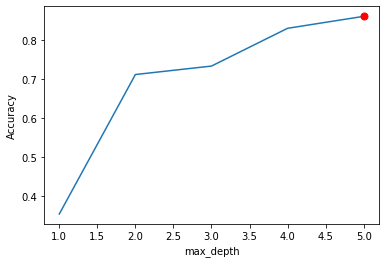

In [239]:
import matplotlib.pyplot as plt

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(max_depth_range,accuracy)
plt.plot([5], [p], marker='o', markersize=7, color="red")

In [240]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(300, 300))
tree.plot_tree(clf,max_depth = 5, precision = 2)
plt.show()

[Text(141.71931818181818, 199.32, 'X[12] <= 9.72\nmse = 88.5\nsamples = 404\nvalue = 22.47'),
 Text(60.872727272727275, 163.07999999999998, 'X[5] <= 7.43\nmse = 80.81\nsamples = 171\nvalue = 29.9'),
 Text(22.827272727272728, 126.83999999999999, 'X[7] <= 1.48\nmse = 44.32\nsamples = 146\nvalue = 27.39'),
 Text(15.218181818181819, 90.6, 'mse = 0.0\nsamples = 5\nvalue = 50.0'),
 Text(30.436363636363637, 90.6, 'X[5] <= 6.8\nmse = 27.12\nsamples = 141\nvalue = 26.59'),
 Text(15.218181818181819, 54.359999999999985, 'X[5] <= 6.12\nmse = 12.05\nsamples = 98\nvalue = 24.07'),
 Text(7.609090909090909, 18.119999999999976, 'mse = 7.07\nsamples = 26\nvalue = 21.03'),
 Text(22.827272727272728, 18.119999999999976, 'mse = 9.31\nsamples = 72\nvalue = 25.16'),
 Text(45.654545454545456, 54.359999999999985, 'X[10] <= 18.9\nmse = 14.02\nsamples = 43\nvalue = 32.33'),
 Text(38.04545454545455, 18.119999999999976, 'mse = 11.95\nsamples = 39\nvalue = 32.86'),
 Text(53.263636363636365, 18.119999999999976, 'mse 

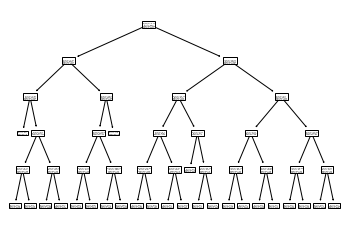

In [241]:
tree.plot_tree(clf,max_depth = 5, precision = 2)

In [242]:
ypred=DT_reg.predict(xtest)
ypred

array([17.77894737, 17.77894737, 22.        , 31.03125   , 14.35      ,
       24.71492537, 20.57283951, 20.57283951, 24.71492537, 34.13043478,
       20.57283951, 27.5       , 20.57283951, 24.71492537, 17.77894737,
       20.51304348, 15.20434783, 10.97142857, 24.71492537, 24.71492537,
       20.57283951, 48.5       , 20.57283951, 20.57283951, 14.35      ,
       17.53333333, 14.18181818, 31.03125   , 24.71492537, 20.57283951,
       24.71492537, 20.57283951, 25.25      , 20.57283951, 24.71492537,
       17.77894737, 14.35      , 20.57283951, 24.71492537, 24.71492537,
       24.71492537, 15.20434783, 24.71492537, 20.37058824, 20.51304348,
       20.37058824, 20.57283951, 20.57283951, 10.97142857, 24.71492537,
       20.57283951, 14.35      , 24.71492537, 24.71492537, 15.20434783,
       24.71492537, 20.57283951, 50.        , 13.175     , 24.71492537,
       20.57283951, 20.57283951, 24.71492537, 10.97142857, 17.77894737,
       50.        , 20.51304348, 20.51304348, 18.275     , 50.  

### Use the model to predict a value of my choice

In [243]:
clf.predict([[0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08]])

array([21.02692308])